In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# import zbioru danych
df = pd.read_csv('https://raw.githubusercontent.com/Jo-llama/ML/refs/heads/main/penguins.csv')

In [6]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


 ## Opis zbioru

# Zestaw danych Palmer Penguins

Zestaw danych **Palmer Penguins** zawiera informacje o pingwinach z trzech wysp archipelagu Palmer Station na Antarktydzie.

---

## Kolumny

| Kolumna              | Typ           | Opis |
|----------------------|---------------|------|
| `species`            | kategoryczna  | Gatunek pingwina: `Adelie`, `Chinstrap`, `Gentoo`. To będzie nasza zmienna zależna (*target*) w zadaniu klasyfikacji. |
| `island`             | kategoryczna  | Wyspa, na której zaobserwowano pingwina: `Torgersen`, `Biscoe`, `Dream`. |
| `culmen_length_mm`   | numeryczna    | Długość dzioba (culmen) w milimetrach. |
| `culmen_depth_mm`    | numeryczna    | Głębokość dzioba (od góry do dołu) w milimetrach. |
| `flipper_length_mm`  | numeryczna    | Długość płetwy w milimetrach. |
| `body_mass_g`        | numeryczna    | Masa ciała pingwina w gramach. |
| `sex`                | kategoryczna  | Płeć: `MALE`, `FEMALE`. Zdarzają się wartości brakujące. |

---

## Typowe zastosowanie

- **Klasyfikacja:** przewidywanie gatunku pingwina (`species`) na podstawie cech morfologicznych.  

---


 ## Czyszczenie zbioru

 ### Sprawdzanie brakujących wartości

In [25]:
# Lista kolumn numerycznych i kategorycznych
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['species', 'island', 'sex']

In [26]:
# Sprawdzenie brakujących wartości
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
# Sprawdź liczbę zer w każdej kolumnie
zero_counts_original = (df == 0).sum()
zero_counts_original

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [27]:
# Filtruj i wyświetl wszystkie wiersze z brakującymi danymi
missing_rows = df[df.isnull().any(axis=1)]
missing_rows


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Widzimy, że dwie linijki nie posiadają żadnych informacji morfologicznych. Należy zatem usunąć te wiersze.

In [ ]:
# Lista kolumn, które muszą mieć dane
feature_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
    

# Usuń wiersze, gdzie WSZYSTKIE z tych kolumn mają brakujące dane
df_filtered = df[~df[feature_cols].isnull().all(axis=1)]


In [29]:
df_filtered = df[~df[feature_cols].isnull().all(axis=1)]
df_filtered.tail(20)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
323,Gentoo,Biscoe,49.1,15.0,228.0,5500.0,MALE
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,MALE
326,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,FEMALE
327,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,MALE
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,FEMALE
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,MALE
330,Gentoo,Biscoe,50.5,15.2,216.0,5000.0,FEMALE
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,MALE
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE


In [30]:
# Pokaż wszystkie unikalne wartości w kolumnie 'sex'
print(df['sex'].dtype)

# Pokaż wszystkie unikalne wartości z typem
for val in df['sex'].unique():
    print(f"{repr(val)} -> {type(val)}")
    
# Pokaż wiersze, gdzie 'sex' to kropka jako tekst
df[df['sex'] == '.']

df['sex'] = df['sex'].replace('.', np.nan)

object
'MALE' -> <class 'str'>
'FEMALE' -> <class 'str'>
nan -> <class 'float'>


### Imputacja brakujących wartości kategorycznych


In [31]:
# Oddzielenie danych z oznaczoną i brakującą płcią
df_known_sex = df_filtered[df_filtered['sex'].notnull()].copy()
df_missing_sex = df_filtered[df_filtered['sex'].isnull()].copy()


In [32]:
# One-hot encoding dla danych wejściowych
X_train = pd.get_dummies(df_known_sex[numerical_cols + categorical_cols])
X_pred = pd.get_dummies(df_missing_sex[numerical_cols + categorical_cols])
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

In [33]:
# Skalowanie danych (Logistic Regression tego wymaga)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# X_pred musi mieć te same kolumny co X_train
X_pred_aligned = X_pred.reindex(columns=X_train.columns, fill_value=0)
X_pred_scaled = scaler.transform(X_pred_aligned)

In [35]:
# Zakodowanie etykiet płci
le = LabelEncoder()
y_train = le.fit_transform(df_known_sex['sex'])

# Trening modelu
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predykcja płci
y_pred = model.predict(X_pred_scaled)
predicted_sex = le.inverse_transform(y_pred)

# Uzupełnij brakującą płeć w df_filtered
df_filtered.loc[df_filtered['sex'].isnull(), 'sex'] = predicted_sex

# Sprawdź wynik
print("Braki w kolumnie 'sex' po imputacji:", df_filtered['sex'].isnull().sum())

ValueError: Must have equal len keys and value when setting with an iterable

Sprawdzamy unikalne wartości

In [36]:
df_filtered['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [37]:
df_filtered[df_filtered['sex'] == '.']  # Sprawdź, czy są jeszcze jakieś kropki

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [38]:
df_filtered.loc[336, 'sex'] = pd.NA

In [39]:
# Tabela współczynników
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

              Feature  Coefficient
11           sex_MALE     2.238080
1     culmen_depth_mm     0.618744
3         body_mass_g     0.553352
0    culmen_length_mm     0.369174
2   flipper_length_mm     0.202865
4      species_Adelie     0.194041
8        island_Dream     0.022748
9    island_Torgersen    -0.001732
7       island_Biscoe    -0.020757
5   species_Chinstrap    -0.109041
6      species_Gentoo    -0.109189
10         sex_FEMALE    -2.238080


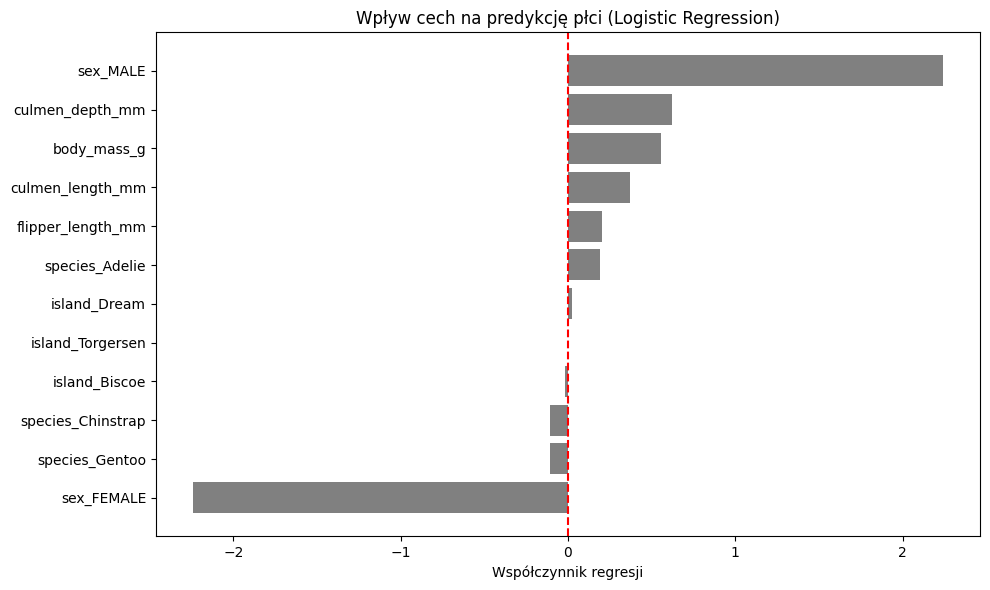

In [40]:
# Wykres słupkowy
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color="gray")
plt.axvline(0, color="red", linestyle="--")
plt.title("Wpływ cech na predykcję płci (Logistic Regression)")
plt.xlabel("Współczynnik regresji")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [41]:
# Predykcja na zbiorze treningowym
y_train_pred = model.predict(X_train_scaled)

# Dokładność (Accuracy)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Raport klasyfikacji
report = classification_report(y_train, y_train_pred, target_names=le.classes_)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      FEMALE       1.00      1.00      1.00       165
        MALE       1.00      1.00      1.00       168

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



In [42]:
# 1. Wiersz danych z wcześniej brakującą płcią
row = df_filtered.loc[[336]].copy()  # zachowujemy DataFrame

# 2. Usuń kolumnę 'sex', bo to etykieta do predykcji
row_features = row[numerical_cols + categorical_cols]

# 3. One-hot encoding
X_row = pd.get_dummies(row_features)

# 4. Dopasowanie kolumn do struktury danych treningowych
X_row = X_row.reindex(columns=X_train.columns, fill_value=0)

# 5. Skalowanie
X_row_scaled = scaler.transform(X_row)

# 6. Predykcja płci za pomocą wytrenowanego modelu
sex_model = LogisticRegression(max_iter=1000)
sex_model.fit(X_train_scaled, y_train)

y_pred = sex_model.predict(X_row_scaled)
predicted_label = le.inverse_transform(y_pred)

# 7. Wynik
print("Przewidziana płeć dla wiersza 336:", predicted_label[0])



Przewidziana płeć dla wiersza 336: FEMALE


In [43]:
df_filtered.loc[336, 'sex'] = predicted_label[0]


In [44]:
df_filtered.loc[336, 'sex']

'FEMALE'

# Klasyfikacja gatunku pingwinów na podstawie cech anatomicznych

W tym notatniku:
1. Przygotujemy dane,
2. Podzielimy na zbiór treningowy i testowy,
3. Wytrenujemy model klasyfikacyjny,
4. Ocenimy wyniki na zbiorze testowym.

In [ ]:
# =========================================
# Przygotowanie danych
# =========================================
# Wybór kolumn i usuwanie braków danych
# Tylko kompletne wiersze zostaną w zbiorze danych

numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[numerical_cols]
y = df['species']
# Wybranie cech i zmiennej docelowej 
# Bedziemy klasyfikować gatunki na podstawie tych cech anatomicznych.


# Czyszczenie danych - Usuwamy wiersze z brakującymi wartościami
# Ponieważ ML algorithms mają trudność z obsługą brakujących wartości.
# X i y będą zawierać tylko kompletne dane.

data = pd.concat([X, y], axis=1).dropna()
X = data[numerical_cols]
y = data['species']

In [ ]:
# =========================================
#  Podział na zbiór treningowy i testowy
# =========================================
# Uczymy się tylko na treningowym, testowy służy do ewaluacji
# Zestaw testowy powinien pozostać niewidoczny podczas treningu modelu.
# Training set: używany do nauki wzorców (80% danych)
# Test set: posłuży do ewaluacji modelu (20% danych)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [50]:
# =========================================
# Skalowanie cech
# =========================================
# Normalizacja cech 
# Rózne cechy anatomiczne mają różne jednostki i skale
# (mm vs g). Skalowanie sprawia, że są porównywalne,

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # tylko train
X_test_scaled = scaler.transform(X_test)        # tylko test

In [52]:
# =========================================
# Kodowanie etykiet gatunków
# =========================================
# Algorytmy potrzebują numerycznych etykiet (nie stringów).
# Dopasowanie enkoder na etykietach treningowych, aby uniknąć wycieku danych.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)



In [54]:
# =========================================
# Trenowanie modelu
# =========================================
# Używamy tylko zbioru treningowego
# Cel: Nauczyć się, jak gatunki są związane z cechami anatomicznymi.


from sklearn.linear_model import LogisticRegression

model_species = LogisticRegression(max_iter=1000)
model_species.fit(X_train_scaled, y_train_enc)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [55]:
# =========================================
# Predykcja i ewaluacja
# =========================================
# Predykcja na TEST SET – model nigdy nie widział tych danych


y_pred = model_species.predict(X_test_scaled)


# Ewaluacja modelu
# Accuracy (czyli trafność) - procent poprawnych przewidywań
# Raport klasyfikacji: precision/recall/F1 per class
# Ten krok pokazuje, jak dobrze model generalizuje się na nowych danych.

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("Classification report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))

Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

